In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [157]:
# Step 0: Load the dataset
file_path = 'cancer_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [158]:
# Assuming 'X' contains the features and 'y' contains the target variable
X = df.drop('Cancer', axis=1)  # Assuming 'Cancer' is the target variable
y = df['Cancer']

In [159]:
# Step 1: Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Step 2: Model Training
# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [161]:
# SVM
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [162]:
# Decision Tree (Unpruned)
tree_unpruned = DecisionTreeClassifier()
tree_unpruned.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
# Decision Tree (Pruned with Max Depth)
max_depth_pruned = 4
tree_pruned_max_depth = DecisionTreeClassifier(max_depth=max_depth_pruned)
tree_pruned_max_depth.fit(X_train, y_train)

# Evaluate the Pruned Tree with Max Depth
tree_pruned_max_depth_pred = tree_pruned_max_depth.predict(X_test)
tree_pruned_max_depth_accuracy = accuracy_score(y_test, tree_pruned_max_depth_pred)
print("Decision Tree (Pruned - Max Depth) Accuracy:", tree_pruned_max_depth_accuracy)


Decision Tree (Pruned - Max Depth) Accuracy: 0.909


In [164]:
# Step 3: Model Evaluation
# KNN
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.8865


In [165]:
# SVM
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.909


In [166]:
# Decision Tree (Unpruned)
tree_unpruned_pred = tree_unpruned.predict(X_test)
tree_unpruned_accuracy = accuracy_score(y_test, tree_unpruned_pred)
print("Decision Tree (Unpruned) Accuracy:", tree_unpruned_accuracy)

Decision Tree (Unpruned) Accuracy: 0.909


In [167]:
# Decision Tree (Pruned)
tree_pruned_pred = tree_pruned.predict(X_test)
tree_pruned_accuracy = accuracy_score(y_test, tree_pruned_pred)
print("Decision Tree (Pruned) Accuracy:", tree_pruned_accuracy)

Decision Tree (Pruned) Accuracy: 0.909


# Visualizations

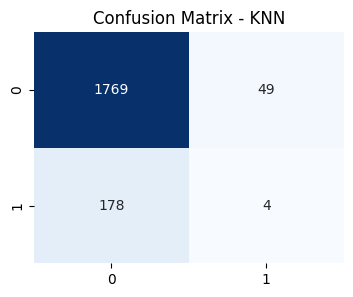

In [168]:
# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(knn_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.show()

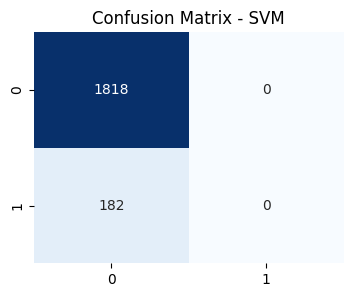

In [169]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(svm_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.show()

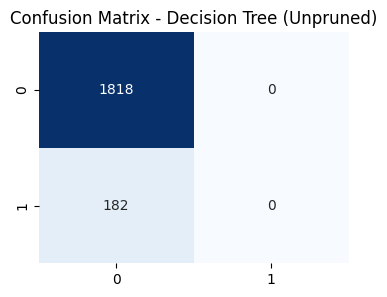

In [170]:
# Confusion Matrix for Decision Tree (Unpruned)
tree_unpruned_cm = confusion_matrix(y_test, tree_unpruned_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(tree_unpruned_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree (Unpruned)')
plt.show()

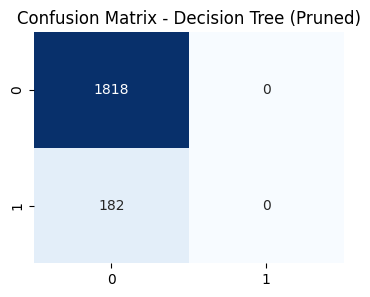

In [171]:
# Confusion Matrix for Decision Tree (Pruned)
tree_pruned_cm = confusion_matrix(y_test, tree_pruned_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(tree_pruned_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree (Pruned)')
plt.show()

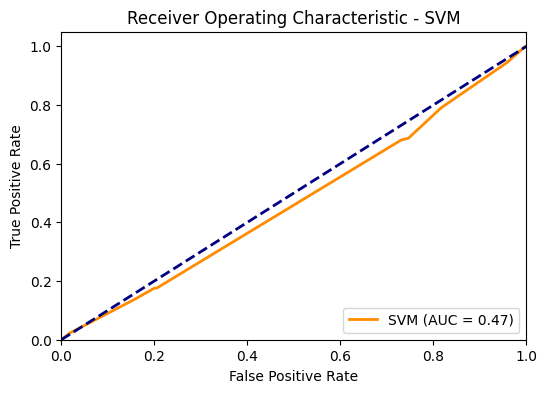

In [172]:
# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()

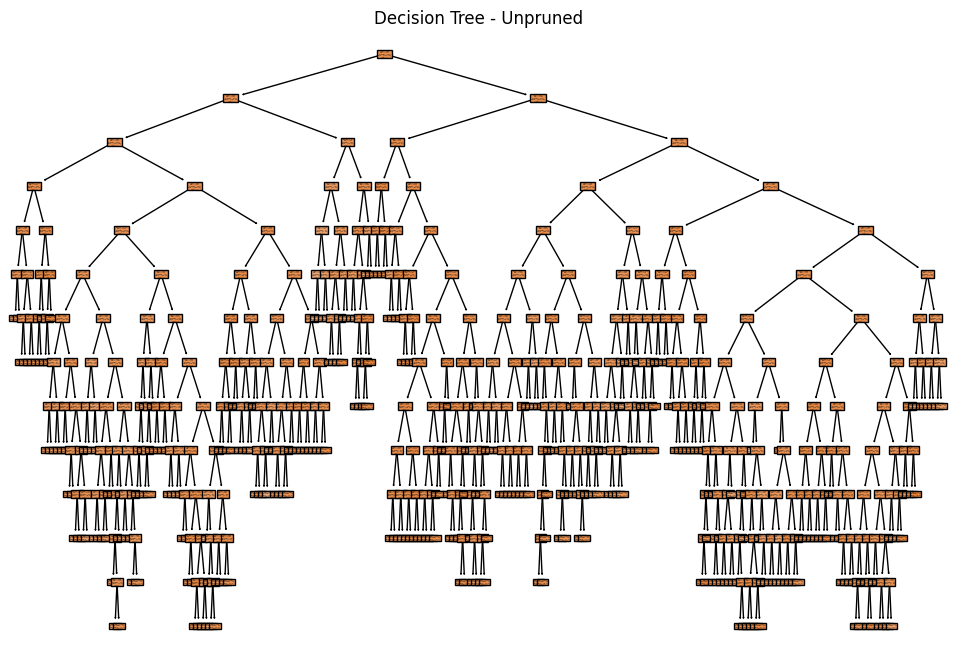

In [173]:
# Plot Decision Tree (Unpruned)
plt.figure(figsize=(12, 8))
plot_tree(tree_unpruned, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree - Unpruned')
plt.show()


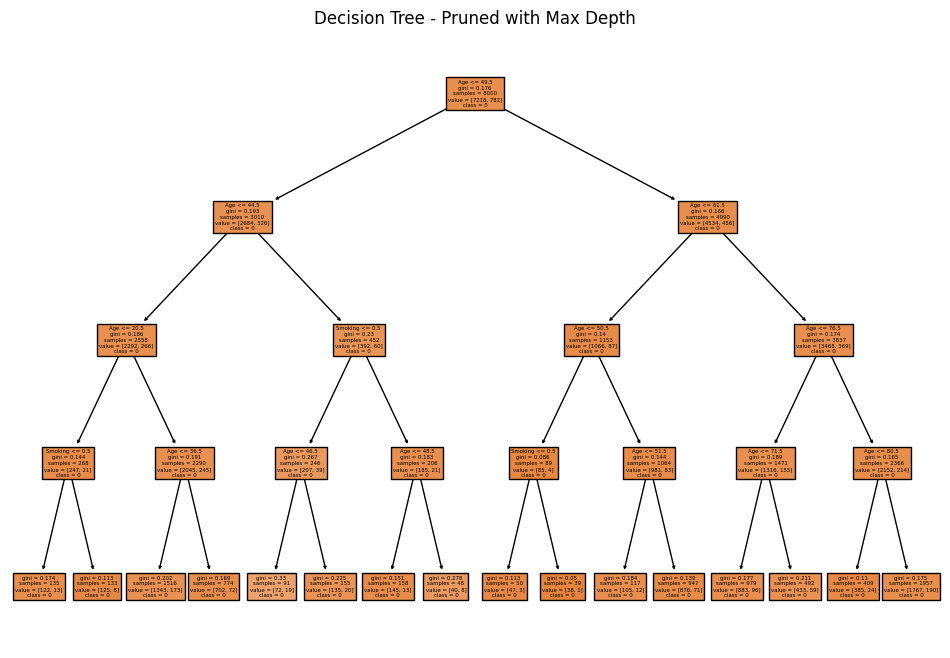

In [174]:
# Plot Decision Tree (Pruned with Max Depth)
plt.figure(figsize=(12, 8))
plot_tree(tree_pruned_max_depth, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree - Pruned with Max Depth')
plt.show()